# **EDA**

Kode ini digunakan untuk memuat dan memeriksa dataset penguins. Dataset dibaca menggunakan fungsi **pd.read_csv()** yang mengimpor file CSV ke dalam sebuah DataFrame bernama df.

Selanjutnya, program menampilkan:
* Dimensi dataset (jumlah baris dan kolom) menggunakan **df.shape**.
* Lima baris pertama data melalui **df.head()** untuk melihat contoh isi dataset.
* Informasi lengkap dataset dengan **df.info()**, yang mencakup tipe data setiap kolom serta jumlah nilai yang tidak kosong (non-null) pada masing-masing kolom.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('penguins_size.csv')

print(f"Dataset shape: {df.shape}")
print(f"Number of records: {df.shape[0]}")
print(f"Number of features: {df.shape[1]}")

print("\n5 baris pertama:")
print(df.head())

print("\nInfo dataset:")
print(df.info())

Dataset shape: (344, 7)
Number of records: 344
Number of features: 7

5 baris pertama:
  species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
3  Adelie  Torgersen               NaN              NaN                NaN   
4  Adelie  Torgersen              36.7             19.3              193.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  FEMALE  

Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non

Kode ini mendeteksi dan menampilkan nilai yang hilang (missing values) pada setiap kolom.
Fungsi **isnull().sum()** menghitung jumlah missing values, sementara persentase dihitung dengan membagi jumlah missing dengan total baris.
Hasilnya kemudian difilter agar hanya menampilkan kolom yang memiliki missing values dan disajikan dalam bentuk DataFrame untuk memudahkan analisis.

In [ ]:
print("\nMISSING VALUES:")
missing_values = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_info = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage': missing_percent
})
print(missing_info[missing_info['Missing Count'] > 0])


MISSING VALUES:
                   Missing Count  Missing Percentage
culmen_length_mm               2            0.581395
culmen_depth_mm                2            0.581395
flipper_length_mm              2            0.581395
body_mass_g                    2            0.581395
sex                           10            2.906977


Kode ini memeriksa adanya baris duplikat yang 100% identik menggunakan fungsi **duplicated()**.
Jika ditemukan duplikat, program menampilkan contoh baris tersebut dan menghapusnya menggunakan **drop_duplicates()**, dengan menyimpan versi pertama dari setiap data.
Jika tidak ada duplikat, akan muncul pesan bahwa data sudah bersih.
Setelah itu, indeks direset dan bentuk (shape) akhir dataset ditampilkan untuk memastikan data siap digunakan.

In [ ]:
initial_shape = df.shape[0]
print(f"Total baris sebelum cek duplikat: {initial_shape}")

duplicates = df.duplicated()
duplicate_count = duplicates.sum()

print(f"\nJumlah baris duplikat (100% identik): {duplicate_count}")

if duplicate_count > 0:
    print("\nContoh baris duplikat:")
    print(df[duplicates].head(3))

    df_clean = df.drop_duplicates(keep='first')
    print(f"\nDuplikat dihapus → baris tersisa: {df_clean.shape[0]}")
else:
    print("\nTIDAK ADA DUPLIKAT → DATA SUDAH BERSIH!")

df_clean = df.reset_index(drop=True)

print(f"\nFinal shape setelah cek duplikat: {df_clean.shape}")

Total baris sebelum cek duplikat: 344

Jumlah baris duplikat (100% identik): 0

TIDAK ADA DUPLIKAT → DATA SUDAH BERSIH!

Final shape setelah cek duplikat: (344, 7)


Kode ini digunakan untuk menampilkan ringkasan statistik deskriptif dari dataset. Fungsi **describe()** memberikan statistik untuk fitur numerik seperti mean, standar deviasi (std), nilai minimum, maksimum, dan kuartil. Sementara itu, **describe(include=['object'])** digunakan untuk fitur kategorikal, yang menampilkan jumlah data (count), jumlah nilai unik (unique), nilai yang paling sering muncul (top), serta frekuensi kemunculannya.

In [ ]:
print("Numerical features:")
print(df.describe())

print("\nCategorical features:")
print(df.describe(include=['object']))

Numerical features:
       culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
count        342.000000       342.000000         342.000000   342.000000
mean          43.921930        17.151170         200.915205  4201.754386
std            5.459584         1.974793          14.061714   801.954536
min           32.100000        13.100000         172.000000  2700.000000
25%           39.225000        15.600000         190.000000  3550.000000
50%           44.450000        17.300000         197.000000  4050.000000
75%           48.500000        18.700000         213.000000  4750.000000
max           59.600000        21.500000         231.000000  6300.000000

Categorical features:
       species  island   sex
count      344     344   334
unique       3       3     3
top     Adelie  Biscoe  MALE
freq       152     168   168


Kode ini digunakan untuk menganalisis distribusi pada kolom species (spesies penguin). Fungsi **value_counts()** menghitung jumlah kemunculan setiap spesies, sedangkan opsi **normalize=True** digunakan untuk mendapatkan proporsinya dalam bentuk persentase dengan mengalikan hasilnya sebesar 100. Hasil akhirnya ditampilkan dalam bentuk DataFrame.

In [ ]:
print("distribusi species:")
species_counts = df['species'].value_counts()
species_percent = df['species'].value_counts(normalize=True) * 100
species_info = pd.DataFrame({
    'Count': species_counts,
    'Percentage': species_percent
})
print(species_info)

distribusi species:
           Count  Percentage
species                     
Adelie       152   44.186047
Gentoo       124   36.046512
Chinstrap     68   19.767442


Kode ini digunakan untuk menganalisis distribusi variabel kategorikal seperti island dan sex. Fungsi **value_counts()** digunakan untuk menampilkan frekuensi dari setiap nilai unik, sedangkan **isnull().sum()** menghitung missing values pada masing-masing kolom. Ini membantu mengidentifikasi ketidakseimbangan atau data hilang di fitur kategorikal.

In [ ]:
print("\nvariabel kategorikal")
print("=" * 30)
categorical_cols = ['island', 'sex']
for col in categorical_cols:
    print(f"\n{col.upper()} distribution:")
    print(df[col].value_counts())
    print(f"Missing values in {col}: {df[col].isnull().sum()}")


variabel kategorikal

ISLAND distribution:
island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64
Missing values in island: 0

SEX distribution:
sex
MALE      168
FEMALE    165
.           1
Name: count, dtype: int64
Missing values in sex: 10


Kode ini digunakan untuk menampilkan ringkasan statistik pada variabel numerik, yaitu culmen_length_mm, culmen_depth_mm, flipper_length_mm, dan body_mass_g. Untuk setiap kolom, program menghitung dan menampilkan nilai rata-rata (mean), median, standar deviasi (std), nilai minimum (min), nilai maksimum (max), serta jumlah data yang hilang (missing values). Informasi ini berguna untuk memahami distribusi dan mendeteksi anomali sebelum preprocessing.

In [ ]:
print("\nvariabel numerik")
numerical_cols = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']

for col in numerical_cols:
    print(f"\n{col}:")
    print(f"  Mean: {df[col].mean():.2f}")
    print(f"  Median: {df[col].median():.2f}")
    print(f"  Std: {df[col].std():.2f}")
    print(f"  Min: {df[col].min():.2f}")
    print(f"  Max: {df[col].max():.2f}")
    print(f"  Missing: {df[col].isnull().sum()}")


variabel numerik

culmen_length_mm:
  Mean: 43.92
  Median: 44.45
  Std: 5.46
  Min: 32.10
  Max: 59.60
  Missing: 2

culmen_depth_mm:
  Mean: 17.15
  Median: 17.30
  Std: 1.97
  Min: 13.10
  Max: 21.50
  Missing: 2

flipper_length_mm:
  Mean: 200.92
  Median: 197.00
  Std: 14.06
  Min: 172.00
  Max: 231.00
  Missing: 2

body_mass_g:
  Mean: 4201.75
  Median: 4050.00
  Std: 801.95
  Min: 2700.00
  Max: 6300.00
  Missing: 2


Kode ini digunakan untuk membuat visualisasi Exploratory Data Analysis (EDA) dalam bentuk grid berukuran 2x3. Pada baris pertama, tiga grafik batang (bar plot) menampilkan distribusi jumlah penguin berdasarkan spesies (species), pulau (island), dan jenis kelamin (sex). Pada baris kedua, tiga grafik kotak (boxplot) menggambarkan perbandingan nilai culmen_length_mm, flipper_length_mm, dan body_mass_g antar spesies. Visualisasi ini membantu memahami sebaran data, melihat perbedaan karakteristik antar kelompok, serta mendeteksi adanya nilai ekstrem atau outlier dalam dataset.


visualisasi data


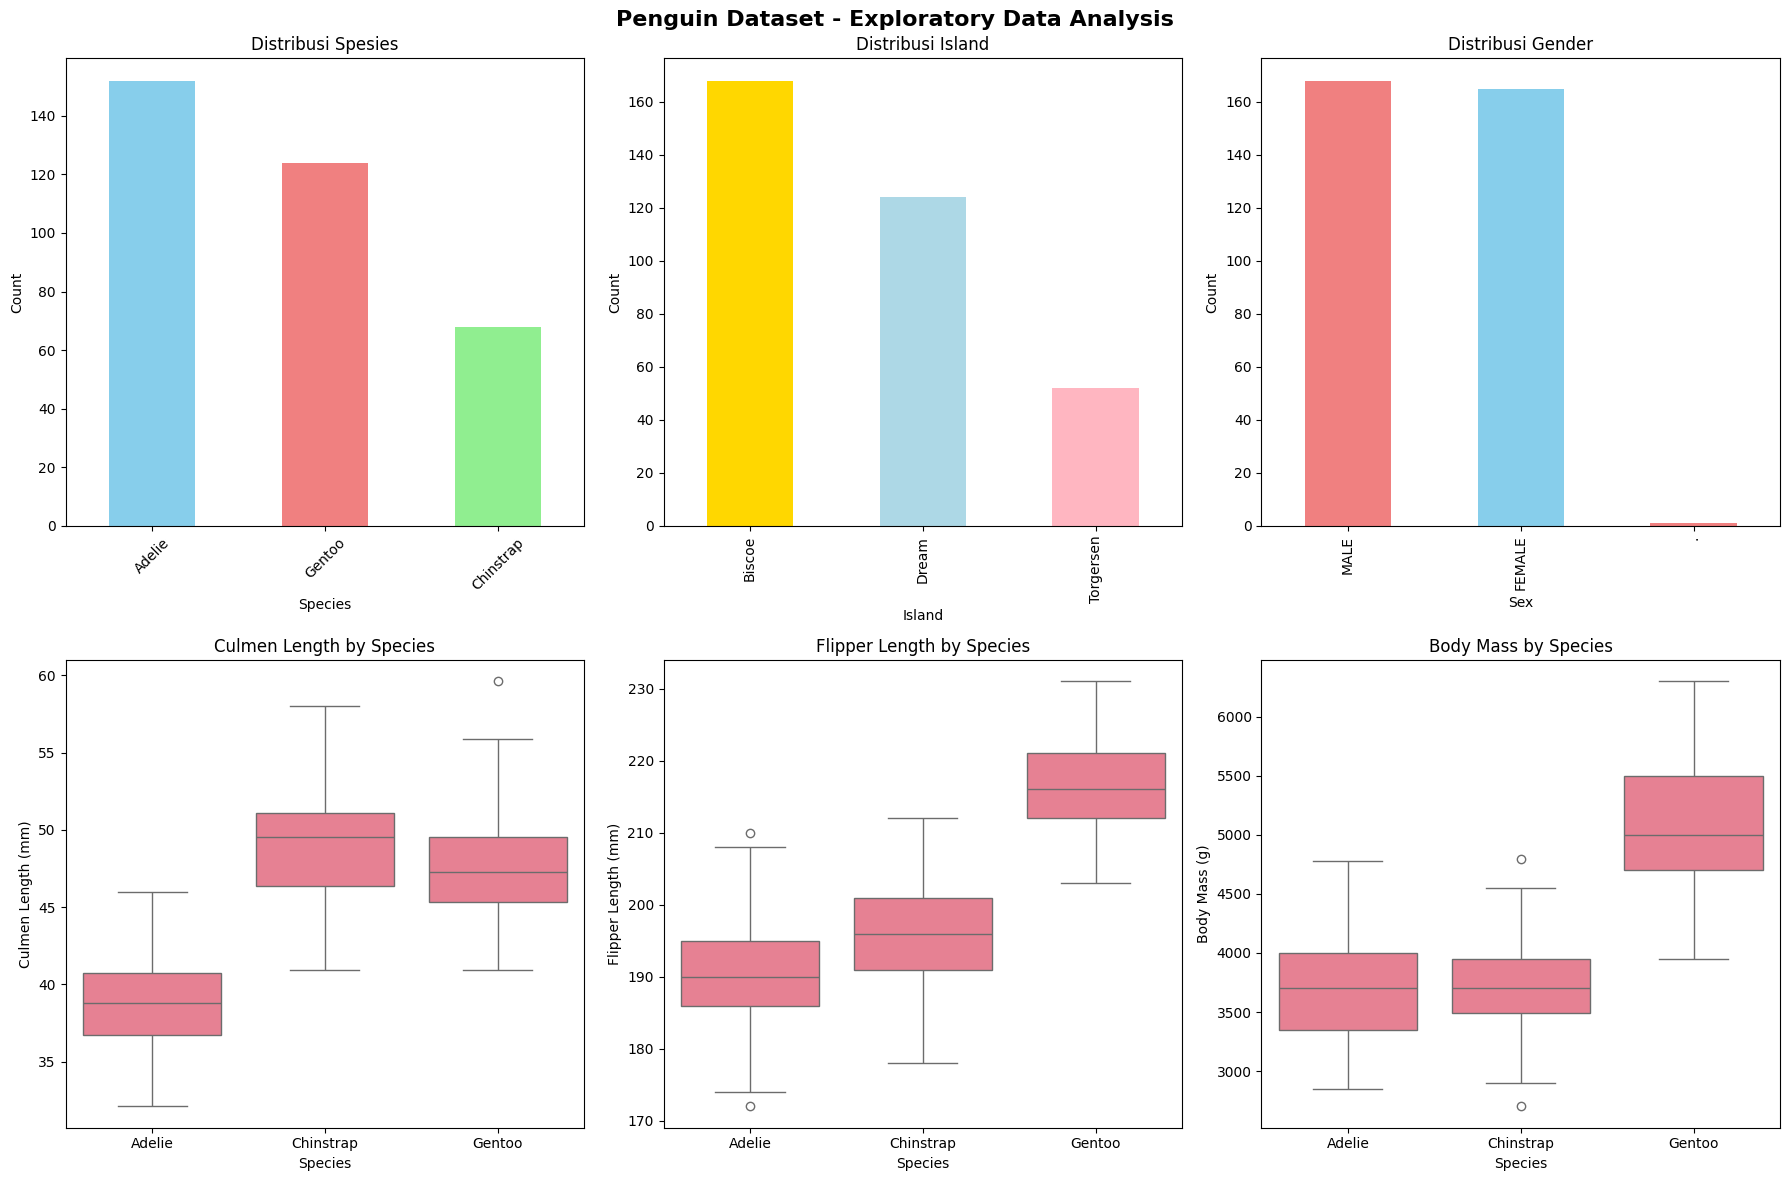

In [ ]:
print("\nvisualisasi data")

# Set up the plotting style
plt.style.use('default')
sns.set_palette("husl")

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Penguin Dataset - Exploratory Data Analysis', fontsize=16, fontweight='bold')

species_counts.plot(kind='bar', ax=axes[0,0], color=['skyblue', 'lightcoral', 'lightgreen'])
axes[0,0].set_title('Distribusi Spesies')
axes[0,0].set_xlabel('Species')
axes[0,0].set_ylabel('Count')
axes[0,0].tick_params(axis='x', rotation=45)

df['island'].value_counts().plot(kind='bar', ax=axes[0,1], color=['gold', 'lightblue', 'lightpink'])
axes[0,1].set_title('Distribusi Island')
axes[0,1].set_xlabel('Island')
axes[0,1].set_ylabel('Count')

df['sex'].value_counts().plot(kind='bar', ax=axes[0,2], color=['lightcoral', 'skyblue'])
axes[0,2].set_title('Distribusi Gender')
axes[0,2].set_xlabel('Sex')
axes[0,2].set_ylabel('Count')

sns.boxplot(data=df, x='species', y='culmen_length_mm', ax=axes[1,0])
axes[1,0].set_title('Culmen Length by Species')
axes[1,0].set_xlabel('Species')
axes[1,0].set_ylabel('Culmen Length (mm)')

sns.boxplot(data=df, x='species', y='flipper_length_mm', ax=axes[1,1])
axes[1,1].set_title('Flipper Length by Species')
axes[1,1].set_xlabel('Species')
axes[1,1].set_ylabel('Flipper Length (mm)')

sns.boxplot(data=df, x='species', y='body_mass_g', ax=axes[1,2])
axes[1,2].set_title('Body Mass by Species')
axes[1,2].set_xlabel('Species')
axes[1,2].set_ylabel('Body Mass (g)')

plt.tight_layout()
plt.show()

Kode ini membuat heatmap korelasi antar fitur dalam dataset. Kategori (species, island, sex) diencode pakai **LabelEncoder()**. Setelah itu, matriks korelasi dihitung dengan **df_corr.corr()** dan divisualisasikan menggunakan **sns.heatmap()** dengan warna yang menunjukkan kekuatan dan arah hubungan antar variabel. Visualisasi ini membantu mengidentifikasi hubungan antar fitur, mendeteksi adanya multikolinearitas, serta menentukan fitur-fitur yang paling penting dalam analisis data.


heatmap:


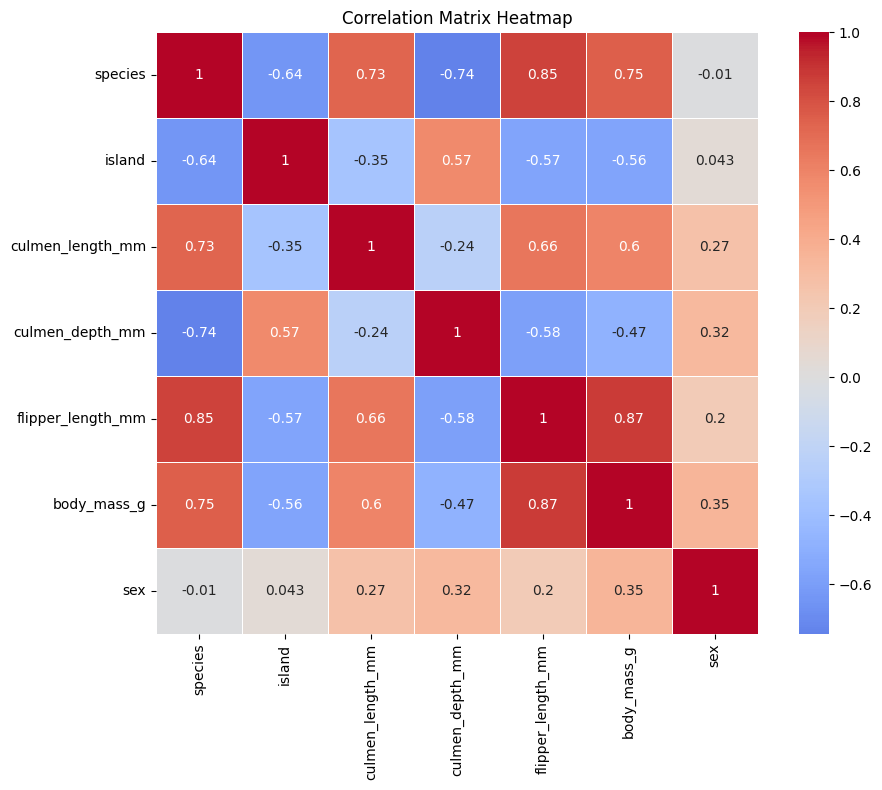

In [ ]:
from sklearn.preprocessing import LabelEncoder, RobustScaler
print("\nheatmap:")

# Create a copy for correlation analysis
df_corr = df.copy()

le = LabelEncoder()
categorical_for_corr = ['species', 'island', 'sex']
for col in categorical_for_corr:
    df_corr[col] = le.fit_transform(df[col].astype(str))

plt.figure(figsize=(10, 8))
correlation_matrix = df_corr.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

# **Data Pre Processing**

## **Data Cleaning**

### *Handling missing value*

Kode ini digunakan untuk membersihkan dan mengisi nilai yang hilang (missing values) pada dataset, terutama pada kolom sex dan fitur numerik lainnya. Pertama, simbol '.' di kolom sex diganti dengan NaN, lalu semua teks diubah menjadi huruf besar agar konsisten.
Nilai yang hilang pada kolom numerik (culmen_length_mm, culmen_depth_mm, flipper_length_mm, body_mass_g) diisi menggunakan metode KNN Imputer dengan **n_neighbors=5**, yang menggantikan nilai kosong berdasarkan kesamaan dengan data terdekat. Untuk kolom sex, nilai yang hilang diisi berdasarkan modus tiap species melalui fungsi **impute_sex_by_species**. Jika masih terdapat nilai kosong, langkah akhir menggunakan SimpleImputer dengan strategi **most_frequent** untuk memastikan semua nilai sex terisi.
Proses ini memastikan seluruh data bersih dan siap untuk analisis lebih lanjut.

In [ ]:
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

df_clean = df.copy()

print("Before cleaning 'sex' column:")
print(df_clean['sex'].value_counts(dropna=False))

# mengganti '.' dengan NaN
df_clean['sex'] = df_clean['sex'].replace('.', np.nan)
df_clean['sex'] = df_clean['sex'].str.upper().str.strip()

print("\nAfter cleaning 'sex' column:")
print(df_clean['sex'].value_counts(dropna=False))

print("Missing values sebelum imputasi:")
print(df_clean.isnull().sum())

numerical_cols = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']

missing_mask = df_clean[numerical_cols].isnull().any(axis=1)
print(f"\nRows with missing numerical values: {missing_mask.sum()}")

knn_imputer = KNNImputer(n_neighbors=5)
df_clean[numerical_cols] = knn_imputer.fit_transform(df_clean[numerical_cols])

print("\ndistribusi gender berdasarkan species sebelum imputasi:")
print(pd.crosstab(df_clean['species'], df_clean['sex'], margins=True))

def impute_sex_by_species(group):
    if group['sex'].isnull().any():
        mode_sex = group['sex'].mode()
        if not mode_sex.empty:
            group['sex'] = group['sex'].fillna(mode_sex.iloc[0])
    return group

df_clean = df_clean.groupby('species').apply(impute_sex_by_species).reset_index(drop=True)

sex_imputer = SimpleImputer(strategy='most_frequent')
df_clean['sex'] = sex_imputer.fit_transform(df_clean[['sex']]).ravel()

print("\nMissing values after imputation:")
print(df_clean.isnull().sum())

Before cleaning 'sex' column:
sex
MALE      168
FEMALE    165
NaN        10
.           1
Name: count, dtype: int64

After cleaning 'sex' column:
sex
MALE      168
FEMALE    165
NaN        11
Name: count, dtype: int64
Missing values sebelum imputasi:
species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

Rows with missing numerical values: 2

distribusi gender berdasarkan species sebelum imputasi:
sex        FEMALE  MALE  All
species                     
Adelie         73    73  146
Chinstrap      34    34   68
Gentoo         58    61  119
All           165   168  333

Missing values after imputation:
species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


Kode ini melakukan encoding pada data kategorikal. Kolom island diubah menjadi beberapa kolom biner menggunakan one-hot encoding dengan **pd.get_dummies()**, lalu digabung ke df_clean. Kolom sex dikonversi menjadi variabel biner is_male, dengan nilai 1 untuk 'MALE' dan 0 untuk lainnya, agar data siap untuk modeling

In [ ]:
# one hot encoding
island_dummies = pd.get_dummies(df_clean['island'], prefix='island')
df_clean = pd.concat([df_clean, island_dummies], axis=1)

# binary encoding
df_clean['is_male'] = (df_clean['sex'] == 'MALE').astype(int)

print(f"One-hot islands: {list(island_dummies.columns)}")

One-hot islands: ['island_Biscoe', 'island_Dream', 'island_Torgersen']


Kode ini digunakan untuk menyiapkan fitur dan target sebelum modeling. Variabel numerik (culmen_length_mm, culmen_depth_mm, flipper_length_mm, body_mass_g) digabung dengan fitur biner hasil encoding (is_male, island_Biscoe, island_Dream, island_Torgersen) menjadi daftar all_features. Data input X_raw dibuat dari kolom-kolom tersebut, sementara y berisi label species. Informasi fitur yang digunakan dan dimensi data ditampilkan untuk memastikan data siap digunakan pada tahap pelatihan model machine learning.

In [ ]:
numeric_features = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
binary_features = ['is_male', 'island_Biscoe', 'island_Dream', 'island_Torgersen']
all_features = numeric_features + binary_features
X_raw = df_clean[all_features].copy()
y = df_clean['species']

print(f"\nFitur digunakan : {all_features}")
print(f"X_raw shape: {X_raw.shape}")


Fitur digunakan : ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g', 'is_male', 'island_Biscoe', 'island_Dream', 'island_Torgersen']
X_raw shape: (344, 8)


Kode ini mengubah label species dari teks menjadi angka menggunakan **LabelEncoder()**.
Proses ini mengonversi setiap kategori, seperti Adelie, Chinstrap, dan Gentoo, menjadi nilai numerik (misalnya 0, 1, 2), lalu hasilnya disimpan dalam variabel **y_encoded**.
Mapping ditampilkan untuk memastikan konsistensi label saat proses prediksi. Diperlukan karena model ML hanya menerima input numerik.

In [ ]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

print("\nMapping spesies → label:")
for i, species in enumerate(le.classes_):
    print(f"  {species} → {i}")


Mapping spesies → label:
  Adelie → 0
  Chinstrap → 1
  Gentoo → 2


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import json

Kode ini digunakan untuk membagi data menjadi train dan test set sekaligus melakukan proses scaling pada fitur numerik.
Data dibagi menjadi train (80%) dan test (20%) dengan stratify agar distribusi kelas seimbang.
Fitur numerik kemudian dinormalisasi menggunakan RobustScaler (tahan outlier). Hasil scaling digabung kembali dengan fitur biner untuk membentuk **X_train** dan **X_test**.
Setiap median dan IQR fitur dicetak serta disimpan dalam **scaler_stats** untuk dokumentasi atau penggunaan ulang.

In [ ]:
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X_raw, y_encoded,
    test_size=0.2,
    random_state=42,
    stratify=y_encoded
)

print(f"\nTrain: {X_train_raw.shape[0]}, Test: {X_test_raw.shape[0]}")

scaler = RobustScaler()
X_train_numeric_scaled = scaler.fit_transform(X_train_raw[numeric_features])
X_test_numeric_scaled = scaler.transform(X_test_raw[numeric_features])

X_train = pd.DataFrame(
    np.hstack([X_train_numeric_scaled, X_train_raw[binary_features].values]),
    columns=[f + '_scaled' for f in numeric_features] + binary_features,
    index=X_train_raw.index
)

X_test = pd.DataFrame(
    np.hstack([X_test_numeric_scaled, X_test_raw[binary_features].values]),
    columns=[f + '_scaled' for f in numeric_features] + binary_features,
    index=X_test_raw.index
)

center = scaler.center_.tolist()
scale = scaler.scale_.tolist()

for feat, med, iqr in zip(numeric_features, center, scale):
    print(f"{feat:>20}:  median = {med:>12.6f},  IQR = {iqr:>12.6f}")

scaler_stats = {
    'center': dict(zip(numeric_features, center)),
    'scale': dict(zip(numeric_features, scale)),
    'feature_order': numeric_features
}

print(json.dumps(scaler_stats, indent=2))


Train: 275, Test: 69
    culmen_length_mm:  median =    44.500000,  IQR =     9.100000
     culmen_depth_mm:  median =    17.300000,  IQR =     3.200000
   flipper_length_mm:  median =   197.000000,  IQR =    23.000000
         body_mass_g:  median =  4050.000000,  IQR =  1212.500000
{
  "center": {
    "culmen_length_mm": 44.5,
    "culmen_depth_mm": 17.3,
    "flipper_length_mm": 197.0,
    "body_mass_g": 4050.0
  },
  "scale": {
    "culmen_length_mm": 9.100000000000009,
    "culmen_depth_mm": 3.1999999999999993,
    "flipper_length_mm": 23.0,
    "body_mass_g": 1212.5
  },
  "feature_order": [
    "culmen_length_mm",
    "culmen_depth_mm",
    "flipper_length_mm",
    "body_mass_g"
  ]
}


Kode ini melatih model **RandomForestClassifier** pada data pada data **X_train, y_train** lalu mengevaluasi performanya. Prediksi dilakukan pada data train dan test dan akurasi dihitung menggunakan **accuracy_score**.
Selisih akurasi antara train dan test digunakan untuk mendeteksi overfitting. Semakin kecil selisih, semakin baik generalisasi model.

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_train_pred = rf_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Prediksi test
y_test_pred = rf_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Akurasi TRAIN: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")
print(f"Akurasi TEST:  {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"\nSelisih (Overfitting Check): {abs(train_accuracy - test_accuracy):.4f}")

Akurasi TRAIN: 1.0000 (100.00%)
Akurasi TEST:  0.9855 (98.55%)

Selisih (Overfitting Check): 0.0145


Kode ini digunakan untuk menganalisis performa model Random Forest melalui learning curve dan perbandingan akurasi.
Fungsi **learning_curve()** menghitung skor pelatihan dan validasi silang (CV) pada berbagai ukuran data latih. Rata-rata dan standar deviasi skor dihitung untuk menilai konsistensi performa.
Bagian pertama grafik menampilkan learning curve, menunjukkan bagaimana akurasi training dan validasi berubah seiring bertambahnya data. Bagian kedua menampilkan perbandingan akurasi train dan test dalam bentuk diagram batang untuk memvisualisasikan keseimbangan performa model.

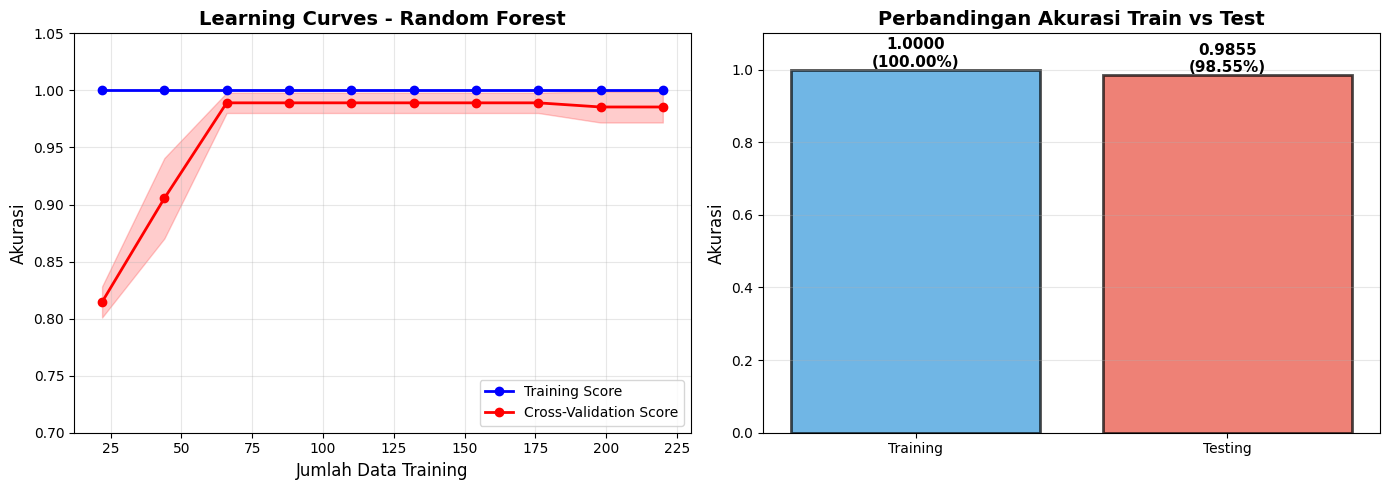

In [ ]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(
    rf_model, X_train, y_train,
    cv=5,
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10),
    random_state=42
)

# Hitung mean dan std
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curves
plt.figure(figsize=(14, 5))

# Subplot 1: Learning Curves
plt.subplot(1, 2, 1)
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training Score', linewidth=2)
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color='blue')
plt.plot(train_sizes, test_mean, 'o-', color='red', label='Cross-Validation Score', linewidth=2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color='red')
plt.xlabel('Jumlah Data Training', fontsize=12)
plt.ylabel('Akurasi', fontsize=12)
plt.title('Learning Curves - Random Forest', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=10)
plt.grid(True, alpha=0.3)
plt.ylim(0.7, 1.05)

# Subplot 2: Train vs Test Accuracy
plt.subplot(1, 2, 2)
categories = ['Training', 'Testing']
accuracies = [train_accuracy, test_accuracy]
colors = ['#3498db', '#e74c3c']
bars = plt.bar(categories, accuracies, color=colors, alpha=0.7, edgecolor='black', linewidth=2)

# Tambahkan nilai di atas bar
for bar, acc in zip(bars, accuracies):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{acc:.4f}\n({acc*100:.2f}%)',
             ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.ylabel('Akurasi', fontsize=12)
plt.title('Perbandingan Akurasi Train vs Test', fontsize=14, fontweight='bold')
plt.ylim(0, 1.1)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

Kode ini membuat Confusion Matrix untuk mengevaluasi hasil prediksi model pada data uji.
Matriks ini menunjukkan jumlah prediksi benar dan salah untuk tiap kelas spesies.
Visualisasi menggunakan heatmap agar lebih mudah dibaca, dengan sumbu X mewakili hasil prediksi model dan sumbu Y menunjukkan label sebenarnya.
Selain itu, ditampilkan juga jumlah total prediksi benar dibandingkan total data untuk memberi gambaran umum akurasi model.

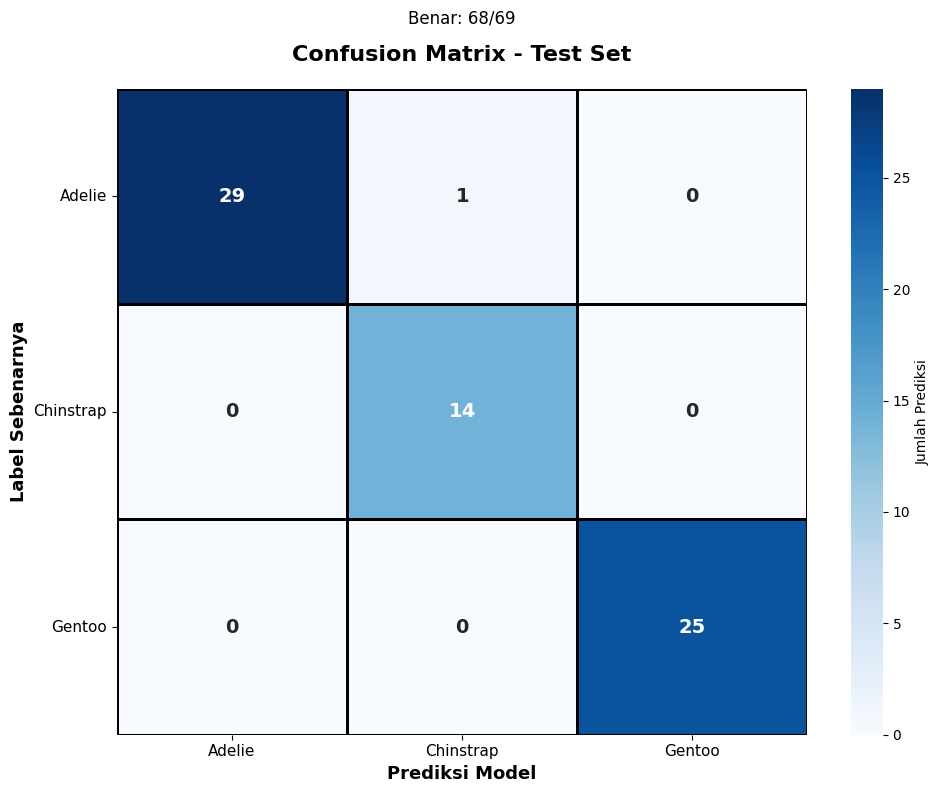

In [ ]:
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_,
            cbar_kws={'label': 'Jumlah Prediksi'},
            linewidths=2, linecolor='black',
            annot_kws={'size': 14, 'weight': 'bold'})

plt.title('Confusion Matrix - Test Set', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Prediksi Model', fontsize=13, fontweight='bold')
plt.ylabel('Label Sebenarnya', fontsize=13, fontweight='bold')
plt.xticks(rotation=0, fontsize=11)
plt.yticks(rotation=0, fontsize=11)

# Tambahkan keterangan
total_correct = np.trace(cm)
total_samples = np.sum(cm)
plt.text(1.5, -0.3, f'Benar: {total_correct}/{total_samples}',
         fontsize=12, ha='center', transform=plt.gca().transData)

plt.tight_layout()
plt.show()

Kode ini menampilkan classification report yang berisi precision, recall, dan F1-score untuk setiap spesies.
Selain ditampilkan dalam teks, hasilnya juga divisualisasikan dalam tiga grafik batang horizontal:
* Grafik pertama menunjukkan precision (ketepatan prediksi tiap kelas).
* Grafik kedua menampilkan recall (kemampuan model mendeteksi kelas dengan benar).
* Grafik ketiga memperlihatkan F1-score, yaitu rata-rata harmonis dari precision dan recall.

Visualisasi ini memudahkan dalam membandingkan performa model untuk setiap spesies.


              precision    recall  f1-score   support

      Adelie       1.00      0.97      0.98        30
   Chinstrap       0.93      1.00      0.97        14
      Gentoo       1.00      1.00      1.00        25

    accuracy                           0.99        69
   macro avg       0.98      0.99      0.98        69
weighted avg       0.99      0.99      0.99        69



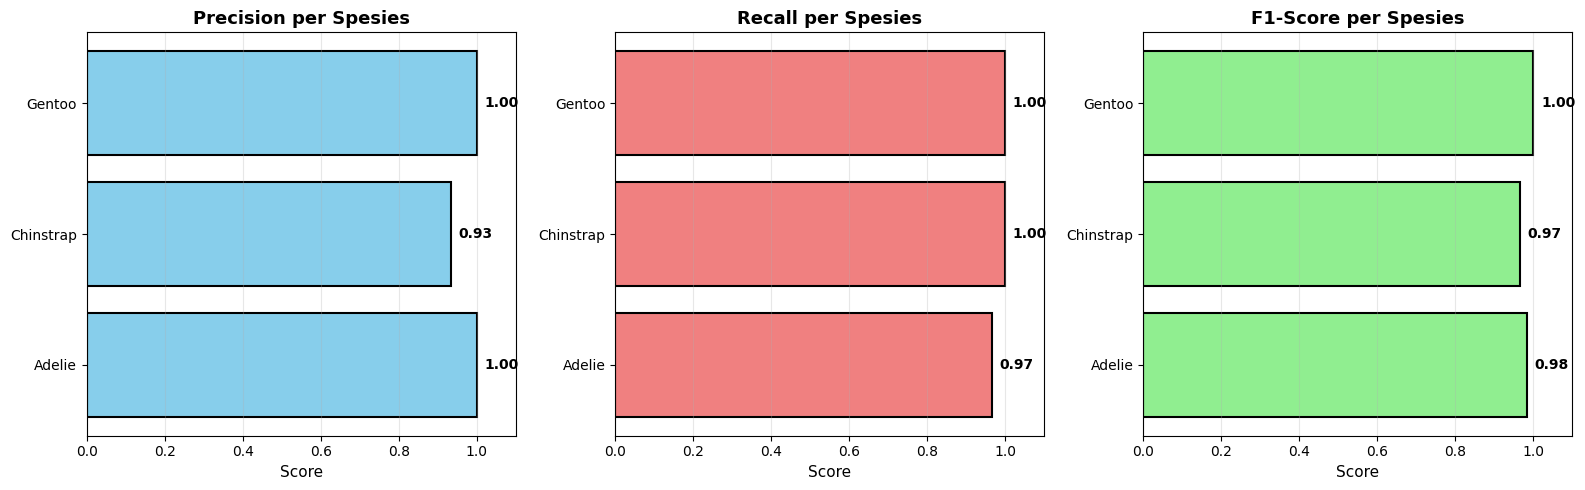

In [ ]:
print("\n" + classification_report(y_test, y_test_pred, target_names=le.classes_))

# Visualisasi classification report
report_dict = classification_report(y_test, y_test_pred, target_names=le.classes_, output_dict=True)

# Extract metrics
species = le.classes_
precision = [report_dict[sp]['precision'] for sp in species]
recall = [report_dict[sp]['recall'] for sp in species]
f1 = [report_dict[sp]['f1-score'] for sp in species]

# Plot
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Precision
axes[0].barh(species, precision, color='skyblue', edgecolor='black', linewidth=1.5)
axes[0].set_xlabel('Score', fontsize=11)
axes[0].set_title('Precision per Spesies', fontsize=13, fontweight='bold')
axes[0].set_xlim(0, 1.1)
axes[0].grid(axis='x', alpha=0.3)
for i, v in enumerate(precision):
    axes[0].text(v + 0.02, i, f'{v:.2f}', va='center', fontweight='bold')

# Recall
axes[1].barh(species, recall, color='lightcoral', edgecolor='black', linewidth=1.5)
axes[1].set_xlabel('Score', fontsize=11)
axes[1].set_title('Recall per Spesies', fontsize=13, fontweight='bold')
axes[1].set_xlim(0, 1.1)
axes[1].grid(axis='x', alpha=0.3)
for i, v in enumerate(recall):
    axes[1].text(v + 0.02, i, f'{v:.2f}', va='center', fontweight='bold')

# F1-Score
axes[2].barh(species, f1, color='lightgreen', edgecolor='black', linewidth=1.5)
axes[2].set_xlabel('Score', fontsize=11)
axes[2].set_title('F1-Score per Spesies', fontsize=13, fontweight='bold')
axes[2].set_xlim(0, 1.1)
axes[2].grid(axis='x', alpha=0.3)
for i, v in enumerate(f1):
    axes[2].text(v + 0.02, i, f'{v:.2f}', va='center', fontweight='bold')

plt.tight_layout()
plt.show()


Kode ini menampilkan feature importance dari model Random Forest.
Semua fitur numerik yang telah diskalakan dan fitur biner digabung menjadi **full_features**.
Setiap fitur diberi nilai kepentingan berdasarkan kontribusi terhadap prediksi model.
Hasilnya divisualisasikan dalam grafik batang horizontal, menunjukkan fitur mana yang paling berpengaruh terhadap keputusan model.

FULL FITUR:
['culmen_length_mm_scaled', 'culmen_depth_mm_scaled', 'flipper_length_mm_scaled', 'body_mass_g_scaled', 'is_male', 'island_Biscoe', 'island_Dream', 'island_Torgersen']


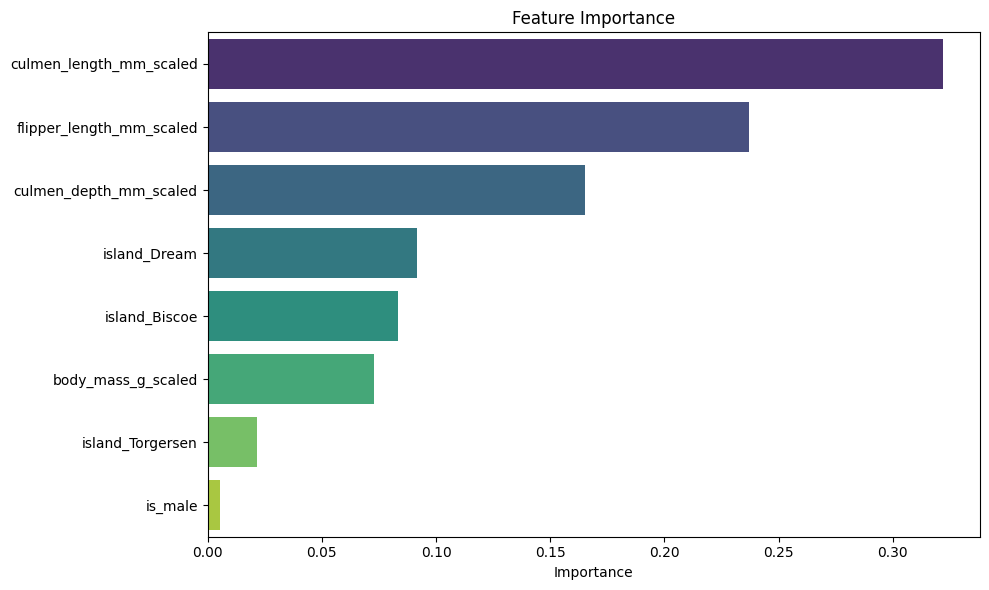

In [ ]:
full_features = [f + '_scaled' for f in numeric_features] + binary_features
print("FULL FITUR:")
print(full_features)
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10,6))
sns.barplot(x=importances[indices], y=np.array(full_features)[indices], palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

Kode ini menyimpan seluruh komponen penting model ke dalam file **penguin_species_model.pkl** menggunakan joblib.
File ini berisi model Random Forest, objek scaler, serta daftar fitur yang digunakan.
Dengan menyimpannya, model dapat digunakan kembali tanpa perlu dilatih ulang.

In [ ]:
import joblib
joblib.dump({
    'model': rf_model,
    'scaler': scaler,
    'full_features': full_features,
    'numeric_features': numeric_features,
    'binary_features': binary_features,
    'scaler_center': scaler.center_.tolist(),
    'scaler_scale': scaler.scale_.tolist()
}, 'penguin_species_model.pkl')

['penguin_species_model.pkl']